# Time Series Data in Pandas

Dates and times can be used as the index of a Pandas data frame. Many time series methods which use data in Pandas format rely on the time information in the index to provide time series functionality. Although there are several types of indexes specific for that, this tutorial is restricted to the type `DatetimeIndex`. To illustrate the use of date indexes, let us take a look at the Bitcoin prices for the past year.

## Downloading the data

We will use Coinmarketcap to obtain the price series of Bitcoin over the past year. They have both an API or a website where you can download the data:

[https://coinmarketcap.com/currencies/bitcoin/historical-data/](https://coinmarketcap.com/currencies/bitcoin/historical-data/)

You can also download the corresponding bitcoin chart that I downloaded some days ago [here](https://raw.githubusercontent.com/ciri/iese-dsfb-mim/main/resources/ts/BTC.json).

In [36]:
import pandas as pd

df = pd.read_csv('../resources/ts/BTC.csv', delimiter=';')
df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume']]
df.columns = ['Date','Open','High','Low','Close','Volume']
df.head()

,Date,Open,High,Low,Close,Volume
0,2025-04-22T23:59:59.999Z,87521.871173,93817.383791,87084.529414,93441.893348,5.589904e+10
1,2025-04-21T23:59:59.999Z,85171.542751,88460.096171,85143.837709,87518.905035,4.139619e+10
2,2025-04-20T23:59:59.999Z,85066.068870,85306.381257,83976.845849,85174.301629,1.466405e+10
3,2025-04-19T23:59:59.999Z,84450.870333,85597.703739,84353.457815,85063.413057,1.525930e+10
4,2025-04-18T23:59:59.999Z,84900.191357,85095.049443,84298.883205,84450.807077,1.272837e+10


Now we need to tell pandas that the first column is not a string, but in fact a date. This is done using the `to_datetime()` command which expects the original series and a format hint as arguments.

In [37]:
# the dates are in a weird format called ISO 8601, the correct
# conversion for this is shown below, you should ask an LLM to do 
# this for you when you're not sure what format it is.
df['Date'] = pd.to_datetime(df.Date,utc=True)

In [38]:
# since Date is the key identifier, it's appropriate to remove it
# from the columns and set it as index instead, we also sort by date
df = df.set_index('Date').sort_index()
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-24 23:59:59.999000+00:00,66408.722066,67075.369646,63589.871929,64276.897415,3.027666e+10
2024-04-25 23:59:59.999000+00:00,64275.021019,65275.207518,62783.633273,64481.706644,3.215579e+10
2024-04-26 23:59:59.999000+00:00,64485.369932,64789.657506,63322.399637,63755.321332,2.413937e+10
2024-04-27 23:59:59.999000+00:00,63750.990146,63898.361592,62424.720682,63419.141196,1.953078e+10
2024-04-28 23:59:59.999000+00:00,63423.513927,64321.482808,62793.598766,63113.231683,1.733483e+10


That's better!

### Datetime indexes in Pandas

Let's take a look at our data types:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2024-04-24 23:59:59.999000+00:00 to 2025-04-22 23:59:59.999000+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    364 non-null    float64
 1   High    364 non-null    float64
 2   Low     364 non-null    float64
 3   Close   364 non-null    float64
 4   Volume  364 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


The index looks interesting, it's called a `DatetimeIndex`:

In [40]:
df.index

DatetimeIndex(['2024-04-24 23:59:59.999000+00:00',
               '2024-04-25 23:59:59.999000+00:00',
               '2024-04-26 23:59:59.999000+00:00',
               '2024-04-27 23:59:59.999000+00:00',
               '2024-04-28 23:59:59.999000+00:00',
               '2024-04-29 23:59:59.999000+00:00',
               '2024-04-30 23:59:59.999000+00:00',
               '2024-05-01 23:59:59.999000+00:00',
               '2024-05-02 23:59:59.999000+00:00',
               '2024-05-03 23:59:59.999000+00:00',
               ...
               '2025-04-13 23:59:59.999000+00:00',
               '2025-04-14 23:59:59.999000+00:00',
               '2025-04-15 23:59:59.999000+00:00',
               '2025-04-16 23:59:59.999000+00:00',
               '2025-04-17 23:59:59.999000+00:00',
               '2025-04-18 23:59:59.999000+00:00',
               '2025-04-19 23:59:59.999000+00:00',
               '2025-04-20 23:59:59.999000+00:00',
               '2025-04-21 23:59:59.999000+00:00',
            

Pandas inherits data type `datetime64` from Numpy. The expression `'ns'` within the square brackets means nanoseconds. The index takes the name of the corresponding column in the data source (`Date`).

This index can be used to select rows, as the following examples shows. Mind that the selection is based on the dates, irrespective order of the index values in the data frame.

In [41]:
df.loc['2024-08-01':]

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-01 23:59:59.999000+00:00,64625.840445,65593.244771,62248.939991,65357.501563,4.097555e+10
2024-08-02 23:59:59.999000+00:00,65353.498474,65523.223571,61184.893198,61415.064573,4.306088e+10
2024-08-03 23:59:59.999000+00:00,61414.808494,62148.371762,59836.527372,60680.094699,3.175303e+10
2024-08-04 23:59:59.999000+00:00,60676.094177,61062.989554,57210.803329,58116.976961,3.175892e+10
2024-08-05 23:59:59.999000+00:00,58110.298456,58268.827409,49121.237378,53991.457797,1.089911e+11
...,...,...,...,...,...
2025-04-18 23:59:59.999000+00:00,84900.191357,85095.049443,84298.883205,84450.807077,1.272837e+10
2025-04-19 23:59:59.999000+00:00,84450.870333,85597.703739,84353.457815,85063.413057,1.525930e+10
2025-04-20 23:59:59.999000+00:00,85066.068870,85306.381257,83976.845849,85174.301629,1.466405e+10


The structure of the index also helps to select the data in special ways. For instance, to select the Friday opening prices, you can apply the function `day_name` to the index:

In [43]:
df.index.day_name()

Index(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday'],
      dtype='object', name='Date', length=364)

In [44]:
df['Open'][df.index.day_name() == 'Friday'].head()

Date
2024-04-26 23:59:59.999000+00:00    64485.369932
2024-05-03 23:59:59.999000+00:00    59122.300852
2024-05-10 23:59:59.999000+00:00    63055.190995
2024-05-17 23:59:59.999000+00:00    65231.298680
2024-05-24 23:59:59.999000+00:00    67928.130286
Name: Open, dtype: float64

Alternatively, you could use `df.index.weekday == 4`. To select the opening prices from a particular month:

In [45]:
df['Open'][df.index.month == 2].head()

Date
2025-02-01 23:59:59.999000+00:00    102402.798115
2025-02-02 23:59:59.999000+00:00    100661.536387
2025-02-03 23:59:59.999000+00:00     97681.103256
2025-02-04 23:59:59.999000+00:00    101398.717040
2025-02-05 23:59:59.999000+00:00     97878.009754
Name: Open, dtype: float64

Also, Pandas takes advantage of the index to format the horizontal axis in a better way, as shown in following chart:

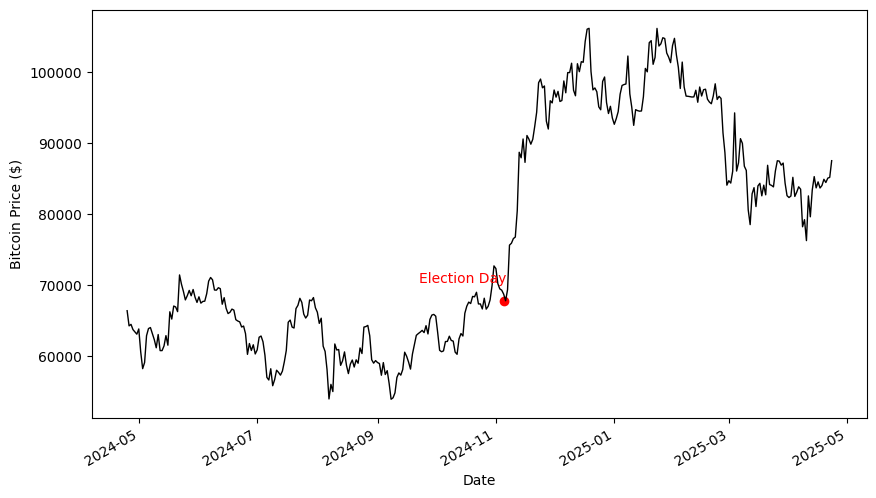

In [10]:
df['Open'].plot(figsize=(10,6), color='black', linewidth=1, ylabel='Bitcoin Price ($)');

# Fancy extra code for text annotation
import matplotlib.pyplot as plt

# Adding text annotation
plt.scatter(pd.Timestamp('2024-11-05'), df.loc['2024-11-05', 'Open'].item(), color='r')
plt.gca().text(x=pd.Timestamp('2024-10-15'), 
               y=df.loc['2024-11-05', 'Open'].item() + 2500, 
               s="Election Day", 
               fontsize=10, color='red', ha='center');

### Calculating returns

**Daily returns** can be obtained with the Pandas function `pct_change`. Though the first observation gets a `NaN` value, because there is no return for the first day, the index of the series is preserved. Mind that `pct_change` uses the current order of the rows, not the date values of the index, so the data have to sorted by date.

In [11]:
df_return = df['Close'].pct_change()
df_return.head()

Date
2024-04-24 23:59:59.999000+00:00         NaN
2024-04-25 23:59:59.999000+00:00    0.003186
2024-04-26 23:59:59.999000+00:00   -0.011265
2024-04-27 23:59:59.999000+00:00   -0.005273
2024-04-28 23:59:59.999000+00:00   -0.004824
Name: Close, dtype: float64

The daily returns can be plotted in the same way as the prices:

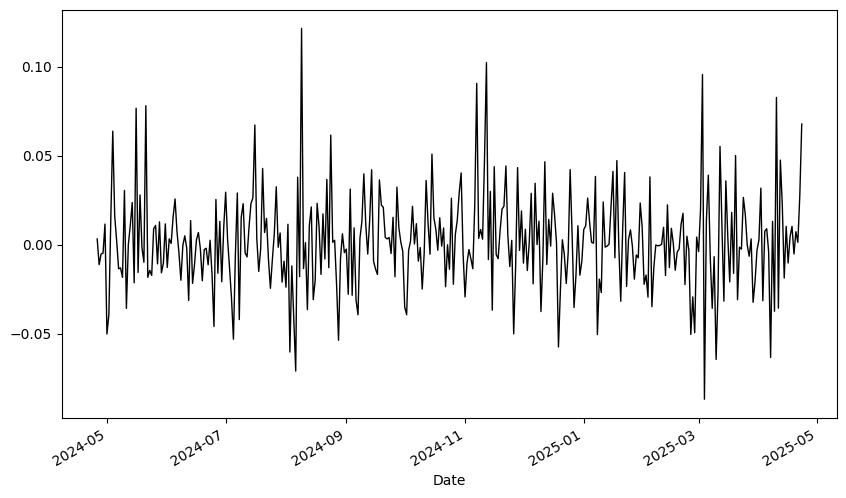

In [12]:
df_return.plot(figsize=(10,6), color='black', linewidth=1);

This can be used for downstream calculations like VaR. **Value at Risk (VaR)** estimates the maximum expected loss over a specified time period at a given confidence level. One way to calculate it, is to look at the histogram distribution.

In [13]:
# Input parameters
confidence_level = 0.95
var_quantile     = 1 - confidence_level
var_value        = df_return.quantile(var_quantile)
print('The VaR at the 95% confidence level is:', var_value)

The VaR at the 95% confidence level is: -0.03912416207042255


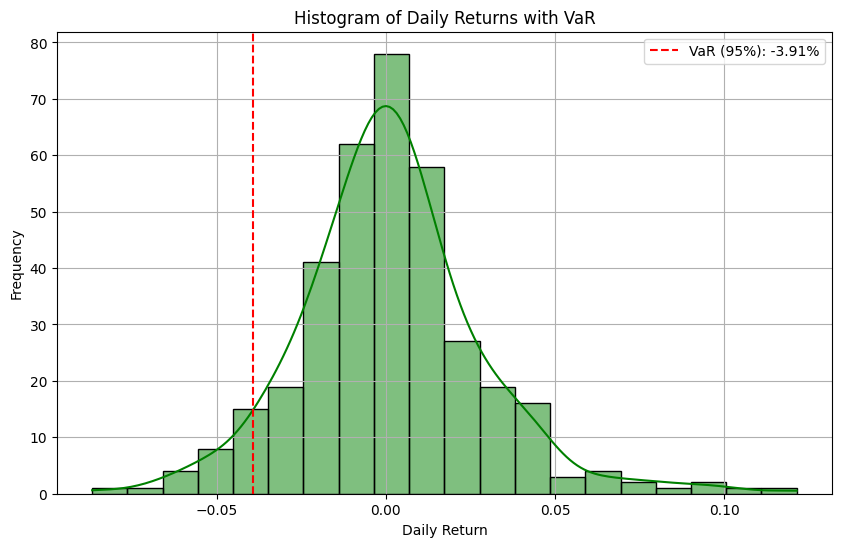

In [14]:
# Plot - I'm using seaborn here for aesthetics the equivalent plt command is: plt.hist(df_Return)
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_return, bins=20, kde=True, color='green', edgecolor='black')
plt.axvline(var_value, color='red', linestyle='--', label=f'VaR ({int(confidence_level*100)}%): {var_value:.2%}')
plt.title('Histogram of Daily Returns with VaR')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

You can interpret this as: on 95% of trading days, you should expect not to lose more than ~4% (this value is high due to recent market chaos!). 1 in 20 days, however, you might.

**Weekly returns**

Weekly returns, based on the percentage change across Fridays, can be calculated after filtering out the rest of the days. Beware that this could be wrong for the weeks in which the Friday is not a trading day.

In [46]:
df_w_return = df[df.index.day_name() == 'Friday']['Close'].pct_change()
df_w_return.head()

Date
2024-04-26 23:59:59.999000+00:00         NaN
2024-05-03 23:59:59.999000+00:00   -0.013575
2024-05-10 23:59:59.999000+00:00   -0.033345
2024-05-17 23:59:59.999000+00:00    0.102958
2024-05-24 23:59:59.999000+00:00    0.021986
Name: Close, dtype: float64

**You try it**

What is the median return (`pct_change`) on the different days of the week if always buy/sell at the High price?

1. Create a new column where you store the day name
2. Create another column to store the percentage change
3. Group by the day column, and calculate the relevant statistic for the percentage change.
4. Plot the result using `df.plot.bar()`

### Resampling

Aggregating time series data by a new time period is often called **resampling**. The method `resample`, designed for Pandas data frames with a `Datetime` is driven by the index. In the following example, I apply this method to get the average weekly open price of Bitcoin.

In [47]:
df_w_open = df['Open'].resample('W').mean()

The same can be done to aggregate the data by month. Note that the series is indexed by the Sundays (even when they are not included in the actual data), this is just how pandas does weekly resampling by default.

In [48]:
df_w_open.head(5)

Date
2024-04-28 00:00:00+00:00    64468.723418
2024-05-05 00:00:00+00:00    61673.539014
2024-05-12 00:00:00+00:00    62195.281432
2024-05-19 00:00:00+00:00    64485.361997
2024-05-26 00:00:00+00:00    68956.823920
Freq: W-SUN, Name: Open, dtype: float64

We can get a line plot of the weekly prices with:

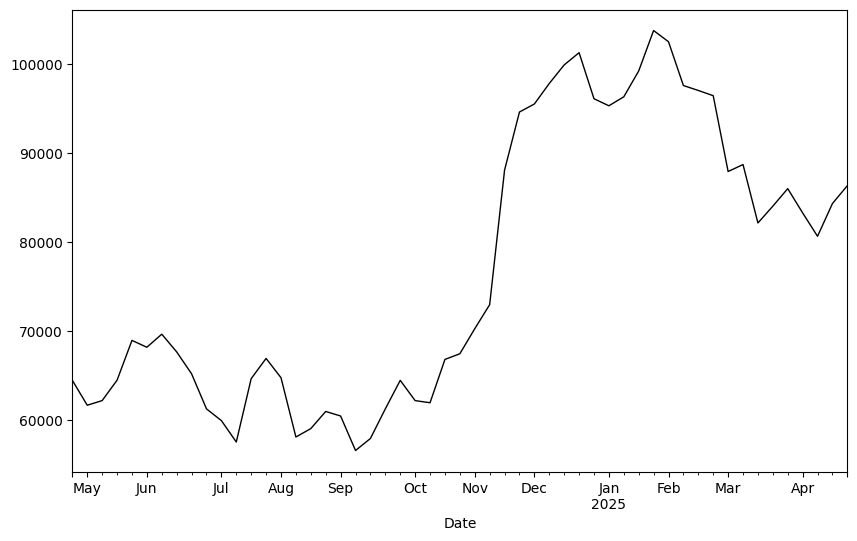

In [49]:
df_w_open.plot(figsize=(10,6), color='black', linewidth=1);

### Rolling windows

The logic of `rolling` is similar to that of `resampling`, but it groups the rows around every value of the index (except at the extremes). The set of these groups is called a **rolling window**. This is easily seen in the following calculation, which extracts a **moving average** (MA) trend for the opening prices (moving average is a popular name for the rolling mean).

In [50]:
df['Open'].rolling(5).mean().head(10)

Date
2024-04-24 23:59:59.999000+00:00             NaN
2024-04-25 23:59:59.999000+00:00             NaN
2024-04-26 23:59:59.999000+00:00             NaN
2024-04-27 23:59:59.999000+00:00             NaN
2024-04-28 23:59:59.999000+00:00    64468.723418
2024-04-29 23:59:59.999000+00:00    63808.251845
2024-04-30 23:59:59.999000+00:00    63721.131614
2024-05-01 23:59:59.999000+00:00    62945.957217
2024-05-02 23:59:59.999000+00:00    61846.500128
2024-05-03 23:59:59.999000+00:00    60986.257513
Name: Open, dtype: float64

As a default, the terms included in the rolling window are collected leftwards. Here the length has been set to 5. So, the first 4 terms of the moving average are `NaN`'s. But you may prefer to center the window in the current observation. In that case, you will get 2 `NaN`'s at each extreme of the series. This is done with:

In [51]:
ma = df['Open'].rolling(5, center=True).mean()
ma.head(10)

Date
2024-04-24 23:59:59.999000+00:00             NaN
2024-04-25 23:59:59.999000+00:00             NaN
2024-04-26 23:59:59.999000+00:00    64468.723418
2024-04-27 23:59:59.999000+00:00    63808.251845
2024-04-28 23:59:59.999000+00:00    63721.131614
2024-04-29 23:59:59.999000+00:00    62945.957217
2024-04-30 23:59:59.999000+00:00    61846.500128
2024-05-01 23:59:59.999000+00:00    60986.257513
2024-05-02 23:59:59.999000+00:00    60943.190782
2024-05-03 23:59:59.999000+00:00    60953.797807
Name: Open, dtype: float64

A moving average is frequently used to create a **nonparametric trend**, that is, a trend which is not given as a mathematical function of time, like a linear or quadratic trend. The chart below illustrates this. The dashed line corresponds to the actual prices, and the solid line to the MA trend.

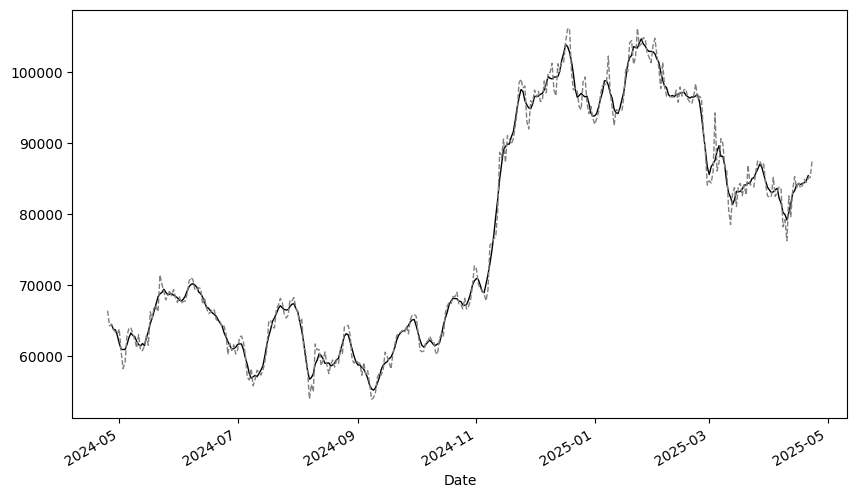

In [52]:
ma.plot(figsize=(10,6), color='black', linewidth=1)
df['Open'].plot(color='gray', linestyle='--', linewidth=1);

<div class='warning'>
This part is only for if we have enough time, though I highly recommend that you try it as it shows how to combine datasets.
</div>

## Microsoft v.s. Apple Analysis

We could do a similar analysis for more traditional stocks like Apple and Microsoft. For this, we'd need to download their respective datasets from [Yahoo Finance](https://finance.yahoo.com/quote/MSFT/history?period1=511056000&period2=1693353600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true) and load it in as usual. Yahoo has recently disabled this functionality from their website but you can either crawl it yourself or use packages that can help you for that.

Let's use  `yfinance` (installed using `! pip install yfinance`). If it doesn't work for you , you can download the time series from here: [MSFT](/www/resources/MSFT.csv), [AAPL](/www/resources/AAPL.csv), [NVDA](/www/resources/NVDA.csv).

In [22]:
! pip install yfinance

You can use this to get all sorts of info on a stock:

In [23]:
import yfinance as yf

ticker = yf.Ticker("AAPL")
info = ticker.info
info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

Including historical price data

In [24]:
# I use to ensure it only downloads the data once!
if(False):
    # Define the date range
    start_date = "1980-12-12"
    end_date = "2025-04-25"

    # Fetch the stock data
    df_msft = yf.download("MSFT", start=start_date, end=end_date)
    df_msft.columns = [col[0] for col in df_msft.columns]
    df_msft.to_csv('../resources/ts/MSFT.csv')

    df_appl = yf.download("AAPL", start=start_date, end=end_date)
    df_appl.columns = [col[0] for col in df_appl.columns]
    df_appl.to_csv('../resources/ts/AAPL.csv')


# Load it back in
df_msft = pd.read_csv('../resources/ts/MSFT.csv', index_col='Date')
df_aapl = pd.read_csv('../resources/ts/AAPL.csv', index_col='Date')
df_aapl.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900
2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400
2025-04-17,196.979996,198.830002,194.419998,197.199997,51334300
2025-04-21,193.160004,193.800003,189.809998,193.270004,46742500
2025-04-22,199.740005,201.589996,195.970001,196.119995,52660200


We have two prices close prices here, it's common to use `Adj Close` for analysis as it normalizes for splits, dividends etc.

We have another problem though, these are separate datasets! How do we combine them into one dataframe?

#### Combining dataframes

In Pandas, there are several ways to combine two dataframes. If we two datasets look the same w.r.t. their columns and we wish to paste them together vertically, we use the `pd.concat([df1,df2])` function. A more frequently occuring scenario is that we need to join two dataframes horiontally based on a common column or index. The most common ways to merge dataframes in Pandas:

**Join**: `df1.join(df2,how='inner')`, joins two dataframes by index. You can also specify a different column using the `on` keyword, but in such cases, it's probably better to use the merge command explained below. The `how` keyword  specifies what happens in case a value is not shared in the common column:
  * `inner` means that a row with an index that only appears in df1 OR in df2, will be dropped in the resulting dataframe
  * `outer` means that all rows are kept, this will create NaN values in rows where the index value only appears in either one of df1 or df2.
  * `left` returns all the rows from the left dataframe and only the matching rows from the right dataframe
  * `right` returns all the rows from the right dataframe and only the matching rows from the left dataframe


**Merge**: `pd.merge(df1,df2,on='common_column',how='inner')`, this merges the two dataframes on their common columns (by default any column that appears in both dataframes). The `how` parameter specifies what happens in case a value is not shared in the common column as explained before.

Note: merging frames is a classic way to crash your kernel as you will potentially use massive amounts of memory. This shouldn't be a problem for this particular dataset though.

#### Exercises

**You try it:**

1. Create two new DataFrames (one for MSFT and one for AAPL) by:
    1. Extracting 1 column with the `Close` price, take care the you extract a dataframe, not a series!
    2. Renaming that column so that it's called `MSFT` and `AAPL` respectively using `.columns`
2. Use the `join` command to merge the apple and microsoft dataframes.

In [25]:
df_msft_open = ... # MSFT dataframe with index Date and column MSFT
df_appl_open = ... # AAPL dataframe with index Date and column AAPL

In [26]:
df_combined = ... # join the two dataframes
                  # select only data after the year 2000       

**You try it**:

1. Select only the data from 2000 onward and plot the price.
2. Use `plot()` to plot the estimated returns since 2000.
3. What would have happened had you started at the beginning of the time series around March 1986?

BONUS: Try adding NVIDIA in the mix.

## Statsmodels

Let's explore how to analyze relationships between variables using regression models.  As we've seen in prior classes, `pandas` allows one to load data and calculate basic statistics. To do more advanced statistics like regressions, we will require the help of other libraries such as `statsmodels`.

Statsmodels is a Python library that provides a wide range of statistical tools and models for data analysis and modeling. It is an open-source package that is built on top of the NumPy and SciPy libraries, and it has gained popularity among data scientists, statisticians, and researchers.

To use Statsmodels in your Python project, you first need to install and import the library into your code. You can do this by using the following import statement:

### The Shiller CAPE Ratio and Long-Term Market Valuation

In his influential book *Irrational Exuberance* (2000), economist Robert Shiller introduced the **CAPE ratio** (Cyclically Adjusted Price-to-Earnings), also known as the **Shiller PE**. This metric smooths earnings over 10 years to reduce short-term volatility and better reflect long-term market valuation.

The CAPE ratio is defined as:

$$
\text{CAPE}_t = \frac{\text{Real Price}_t}{\frac{1}{120} \sum_{i=1}^{120} \text{Real Earnings}_{t-i}}
$$

Shiller demonstrated that CAPE can help predict long-term real returns of the stock market. Specifically, periods with a high CAPE ratio tend to precede lower average **10-year real returns**. This relationship can be modeled using a simple linear regression:

$$
\text{Future 10-Year Real Return}_t = \beta_0 + \beta_1 \cdot \text{CAPE}_t + \epsilon_t
$$

with $\beta_1 < 0$. This model underpins the argument that high valuations are often followed by weaker future performance, highlighting market inefficiencies and investor overconfidence.


### The Schiller CAPE Ratio

In [27]:
import pandas as pd

# Load the data
df = pd.read_csv("../resources/ts/sp500.csv", parse_dates=["Date"])

# Clean duplicate 1871-01 rows
df = df.drop_duplicates(subset="Date")  

# Filter for data after 1900
df = df[df["Date"] >= "1900-01-01"]

df.head(3)

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
348,1900-01-01,6.10,0.22,0.48,7.90,3.15,236.46,8.43,18.61,22.59
349,1900-02-01,6.21,0.22,0.48,7.99,3.15,237.86,8.62,18.39,22.60
350,1900-03-01,6.26,0.23,0.48,7.99,3.14,239.78,8.91,18.39,22.66


First let's look at this seemingly complex formula:
$$
\text{CAPE}_t = \frac{\text{Real Price}_t}{\frac{1}{120} \sum_{i=1}^{120} \text{Real Earnings}_{t-i}}
$$

Let's say $t$ is the current date of the dataframe. Then we need to find the real price of TODAY (we have this, it's called `Real Price`), and also the sum of the `Real Earnings` over the prior 120 days.


In [28]:
df["RealEarningsAvg10y"] = df["Real Earnings"].rolling(window=120).mean()
df["CAPE"] = df["Real Price"] / df["RealEarningsAvg10y"]

In [29]:
print(df["CAPE"].isna().sum()) # note defined for the first years as we don't have prior data ...
df.dropna(subset="CAPE", inplace=True)

119


Now we need to calculate our Y, the future 10-year real return which is defined as:

$$
    \text{Future 10-Year Real Return}_t = \frac{\text{Real Price}_{t+120}}{\text{Real Price}_t} - 1
$$

In [30]:
# Compute 10-year forward real return
df["FutureRealPrice"]  = df["Real Price"].shift(-120)
df["FutureReturn"]     = (df["FutureRealPrice"] / df["Real Price"]) - 1

# Here again we'll have zeros, this time for the last couple of elements
df.dropna(subset='FutureReturn', inplace=True)

Let's try the regression!

In [31]:
import statsmodels.formula.api as smf

model = smf.ols("FutureReturn ~ CAPE", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           FutureReturn   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.02e-36
Time:                        10:42:11   Log-Likelihood:                -1245.7
No. Observations:                1123   AIC:                             2495.
Df Residuals:                    1121   BIC:                             2506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1861      0.053     22.260      0.0

> An $R^2$ of this magnitude is considered high in financial data. The coefficients are significant and show that a 1-point increase in the CAPE ratio predicts a \~4.85 percentage point decrease in the 10-year real return. This regression therefore replicates a key insight from Irrational Exuberance: when the market is expensive relative to historical earnings, future long-term real returns are likely to be lower. This is not investment advice :-).

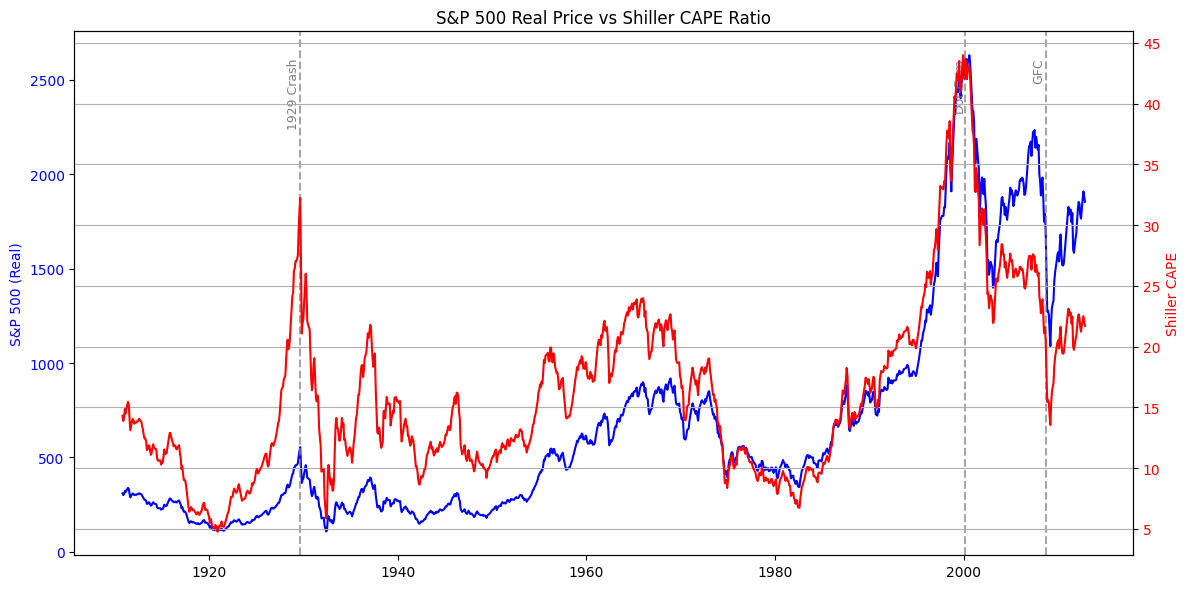

In [32]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Real Price on left axis
ax1.plot(df["Date"], df["Real Price"], color='blue', label='S&P 500 (Real Price)')
ax1.set_ylabel("S&P 500 (Real)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')



# Add second y-axis for CAPE
ax2 = ax1.twinx()
ax2.plot(df["Date"], df["CAPE"], color='red', label='Shiller CAPE')
ax2.set_ylabel("Shiller CAPE", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add vertical lines for key events
events = {
    "1929 Crash": "1929-09-01",
    "Dot-Com": "2000-03-01",
    "GFC": "2008-09-01"
}

for label, date_str in events.items():
    date = pd.to_datetime(date_str)
    ax1.axvline(date, color='gray', linestyle='--', alpha=0.7)
    ax1.text(date, ax1.get_ylim()[1]*0.95, label, rotation=90, color='gray', ha='right', va='top', fontsize=9)

# Title and grid
plt.title("S&P 500 Real Price vs Shiller CAPE Ratio")
fig.tight_layout()
plt.tight_layout()
plt.grid(True)
plt.show()

**You try it**

You show your Nobel-prize winning model to your friend and she says she's not convinced because she thinks you should account for the general macro economic environment as well. Thus, you want to change your claim to: _regardless of macro outlook at the time, CAPE is a strong indicator for recessions_.

Show this using a proxy for macro outlook: the long interest rate.

#### References

Original AAPL/MSFT content adapted from: Miguel Ángel Canela

Data and Schiller example are from _Irrational Exuberance_, Schiller 2000.